# Spotify Audio Feature Analysis: 
  ### A Comparative Study of Top 2000s, Global Top 5, and Notable Artists

**Research Motivation:**

This analysis provides an exciting opportunity to delve into the evolution of popular music and identify the characteristics that contribute to a song's success. 
This analysis offers a compelling opportunity to examine the evolution of musical characteristics and their relationship with popularity over several decades. The insights derived from this analysis will not only enhance our understanding of the trajectory of popular music but also provide valuable context for anticipating future trends in the music landscape.

 **Research Questions:**
 
This research seeks to address several critical questions:

What characteristics are common among the most popular songs?

How have trends in music shifted over time?

Are there specific artists or genres that consistently produce top hits?

To what extent can popularity be predicted based on these characteristics?


**Data Overview:**

The analysis draws upon two distinct datasets that offer a comprehensive view of both historical and contemporary music trends.


The primary dataset,
[Spotify - All Time Top 2000s Mega Dataset](https://www.kaggle.com/datasets/iamsumat/spotify-top-2000s-mega-dataset/data), comprises the top 2000 tracks on Spotify, spanning releases from 1956 to 2019. This dataset features tracks from iconic artists such as Queen, The Beatles, and Guns N' Roses, and includes a rich array of audio features that provide a deep dive into the characteristics that have defined popular music over the last 60 years.

To complement the historical analysis, a secondary dataset was extracted using the Spotify API, capturing audio features for the top 50 songs currently trending globally on Spotify. This real-time dataset offers a snapshot of contemporary musical preferences, serving as a critical point of comparison to assess how current trends align or diverge from those observed in previous decades.

 **Feature Descriptions**
 
Both datasets encompass a set of key features essential for this analysis:

Artist: The performer of the track.

Top Genre: The genre classification of the track.

Year: The release year of the track.

Beats per Minute (BPM): The tempo of the song.

Energy: A measure of the track's intensity and activity.

Danceability: Indicates the suitability of the song for dancing.

Loudness: The volume level of the track.

Valence: Reflects the positivity of the song's mood.

Length: The duration of the track.

Acousticness: The degree to which the song is acoustic.

Speechiness: The amount of spoken word content in the song.

Popularity: A measure of the song's popularity on Spotify.


# Data Preparation 

**Importing and Loading the Dataset:** 
To begin our analysis, we will first import the necessary libraries and load the [Spotify - All Time Top 2000s Mega Dataset](https://www.kaggle.com/datasets/iamsumat/spotify-top-2000s-mega-dataset/data) and initiate our data tidying process. 
---

In [2]:
import pandas as pd 
spotify_df = pd.read_csv('Spotify-2000.csv')
spotify_df.info  

<bound method DataFrame.info of       Index                   Title                    Artist  \
0         1                 Sunrise               Norah Jones   
1         2             Black Night               Deep Purple   
2         3          Clint Eastwood                  Gorillaz   
3         4           The Pretender              Foo Fighters   
4         5  Waitin' On A Sunny Day         Bruce Springsteen   
...     ...                     ...                       ...   
1989   1990        Heartbreak Hotel             Elvis Presley   
1990   1991               Hound Dog             Elvis Presley   
1991   1992         Johnny B. Goode               Chuck Berry   
1992   1993               Take Five  The Dave Brubeck Quartet   
1993   1994          Blueberry Hill               Fats Domino   

                Top Genre  Year  Beats Per Minute (BPM)  Energy  Danceability  \
0         adult standards  2004                     157      30            53   
1              album rock

In [3]:
#checking for duplicates
duplicates = spotify_df.duplicated().sum()
print (duplicates)

0


In [5]:
print(spotify_df.dtypes)

non_numeric_cols = spotify_df.select_dtypes(include=['object']).columns
print(non_numeric_cols)

Index                      int64
Title                     object
Artist                    object
Top Genre                 object
Year                       int64
Beats Per Minute (BPM)     int64
Energy                     int64
Danceability               int64
Loudness (dB)              int64
Liveness                   int64
Valence                    int64
Length (Duration)         object
Acousticness               int64
Speechiness                int64
Popularity                 int64
dtype: object
Index(['Title', 'Artist', 'Top Genre', 'Length (Duration)'], dtype='object')


In [6]:
spotify_df.fillna({
    'Energy': 0,  # Fill with 0
    'Beats Per Minute (BPM)': 0,
    'Danceability': 0,  
    'Loudness (dB)': 0,
    'Liveness': 0,
    'Valence': 0,
    'Acousticness': 0,
    'Speechiness': 0,
    'Popularity': 0,
 },
  inplace=True)


Outliers, which can skew the results, are identified and filtered using z-scores. Rows with z-scores greater than three standard deviations from the mean are removed, leaving us with a dataset that accurately represents the majority of the data without extreme values distorting the analysis. This cleaned and standardized dataset becomes the foundation for exploratory analysis. 

In [9]:
from scipy import stats
import numpy as np

# Select only numeric columns
numeric_cols = spotify_df.select_dtypes(include=[np.number])

# Calculate z-scores for all numeric columns
z_scores = np.abs(stats.zscore(numeric_cols))

z_scores_df = pd.DataFrame(z_scores, columns=numeric_cols.columns)

# Fill any NaN values with 0
z_scores_df.fillna(0, inplace=True)

# Replace only numeric columns in the original DataFrame with their z-scores
spotify_df[numeric_cols.columns] = z_scores_df

# Display the updated DataFrame
print(spotify_df.head())

numeric_cols = spotify_df.select_dtypes(include=[np.number])

# Filter out rows with z-scores greater than 3; outliers
filtered_df = spotify_df[(z_scores_df < 3).all(axis=1)]
print(filtered_df)


                    Title             Artist            Top Genre      Year  \
0                 Sunrise        Norah Jones      adult standards  0.911692   
1             Black Night        Deep Purple           album rock  0.060369   
2          Clint Eastwood           Gorillaz  alternative hip hop  0.182646   
3           The Pretender       Foo Fighters    alternative metal  1.640737   
4  Waitin' On A Sunny Day  Bruce Springsteen         classic rock  0.425661   

   Beats Per Minute (BPM)    Energy  Danceability  Loudness (dB)  Liveness  \
0                0.059941  0.167969      0.897710       0.285093  0.311696   
1                0.663230  1.412682      0.323574       0.554412  0.289369   
2                1.185157  0.070335      1.347738       0.800190  0.633007   
3                1.696619  1.181282      1.016076       0.296741  0.232297   
4                0.605056  0.954924      0.031995       0.386384  0.411873   

    Valence Length (Duration)  Acousticness  Speechiness

# Descriptive Statistics & Correlation Analysis

In [10]:
import pandas as pd

numeric_cols = z_scores_df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_cols.corr()

# Display matrix
print(correlation_matrix)


                            Year  Beats Per Minute (BPM)    Energy  \
Year                    1.000000                0.044287 -0.005104   
Beats Per Minute (BPM)  0.044287                1.000000  0.026826   
Energy                 -0.005104                0.026826  1.000000   
Danceability            0.015524                0.008355  0.036798   
Loudness (dB)          -0.058196                0.010927  0.369942   
Liveness                0.008266               -0.030316 -0.054841   
Valence                 0.024511                0.003099  0.027732   
Acousticness           -0.004718                0.041967  0.252313   
Speechiness             0.001140                0.066016 -0.010553   
Popularity             -0.013980                0.006777  0.020814   

                        Danceability  Loudness (dB)  Liveness   Valence  \
Year                        0.015524      -0.058196  0.008266  0.024511   
Beats Per Minute (BPM)      0.008355       0.010927 -0.030316  0.003099   
Ener

Upon initial inspection, the analysis points to a weak correlation between most features and popularity. There is no single feature standing out as a strong predictor of a songs popularity. For instance, the correlation between most auditory features and popularity in the 2000s dataset are almost negligible. This finding challenges the common assumption that faster or slower songs are inherently more popular, suggesting that other factors are at play in determining a track's success.

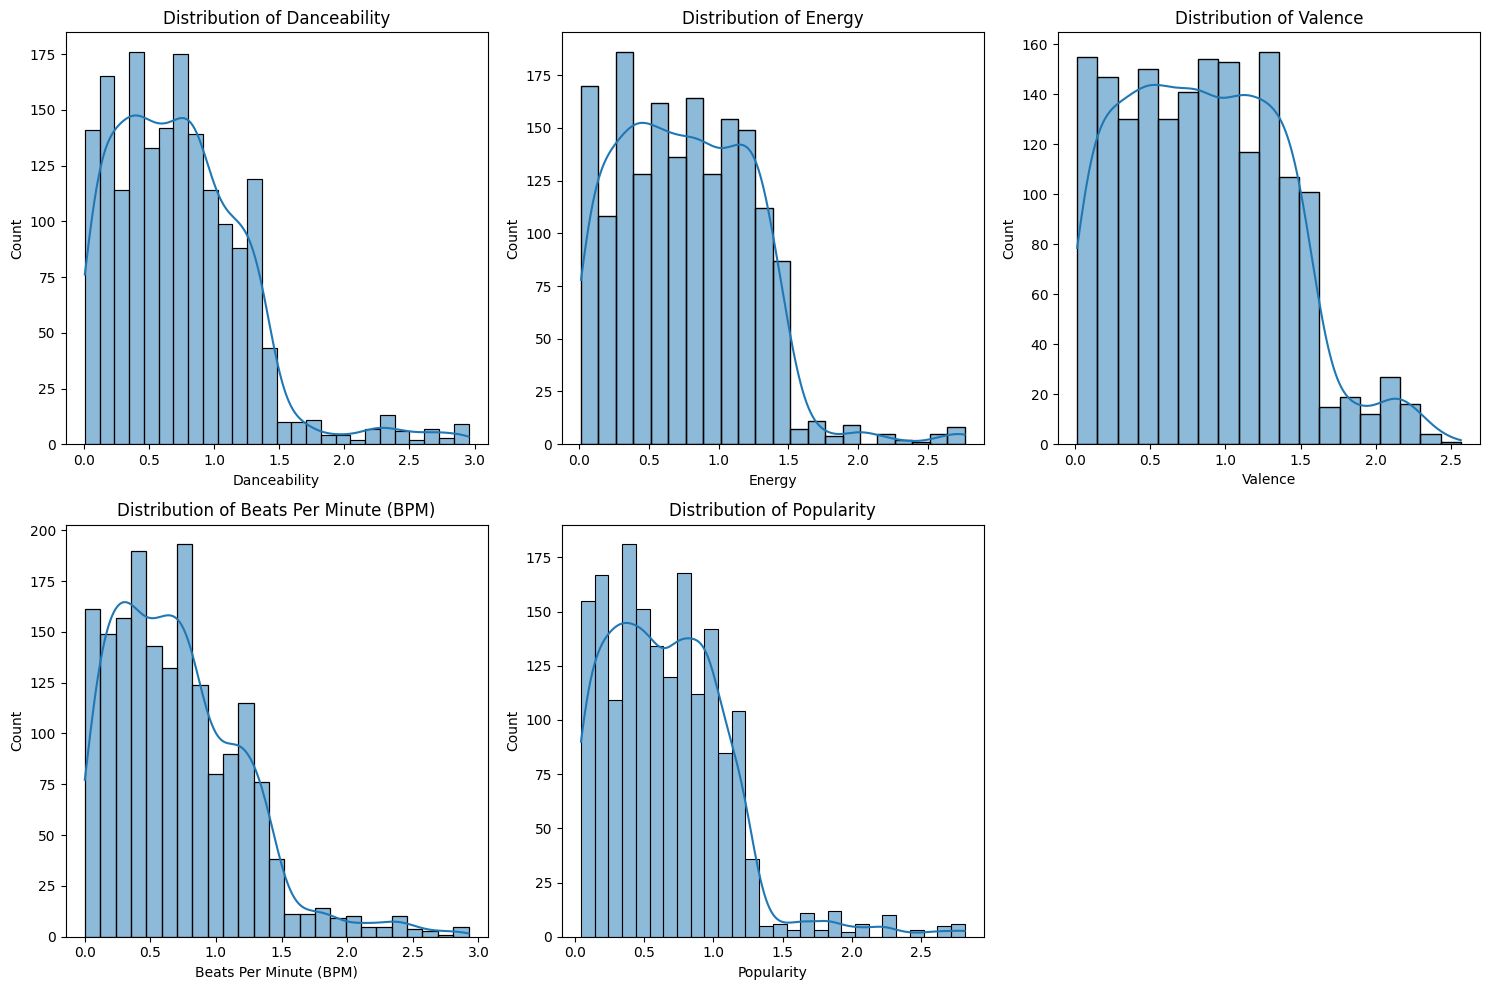

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histograms for key features
features = ['Danceability', 'Energy', 'Valence', 'Beats Per Minute (BPM)', 'Popularity']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(filtered_df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


**Feature Distribution Analysis**

Danceability: The distribution is skewed to the left, indicating that most songs in the dataset are less danceable.

Energy: The distribution shows a relatively uniform spread across lower and middle ranges, with a sharp decline in high-energy songs.

Valence: This feature is slightly skewed to the left, implying that more songs have a sadder or neutral tone rather than a happy one.

Beats Per Minute (BPM): The BPM distribution is spread out with noticeable peaks, suggesting that certain tempos are more common, possibly due to genre conventions or listener preferences.

While we cannot define linear relationships, we tend to see trends in certain choices in popular music. 

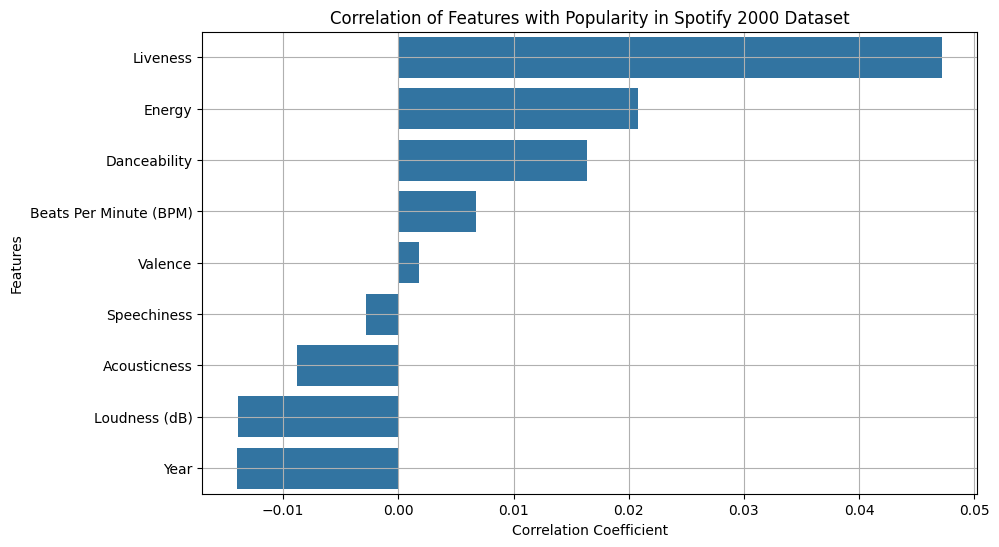

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_cols_2000 = spotify_df.select_dtypes(include=['number'])

# Calculate the correlation matrix 
correlation_matrix_2000 = numeric_cols_2000.corr()

# Get the correlation of each feature with 'Popularity'
popularity_correlation_2000 = correlation_matrix_2000['Popularity'].sort_values(ascending=False)

# Exclude 'Popularity' from the correlation data
popularity_correlation_2000_no_self = popularity_correlation_2000.drop('Popularity')

# Bar plot of the correlation coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x=popularity_correlation_2000_no_self.values, y=popularity_correlation_2000_no_self.index)
plt.title('Correlation of Features with Popularity in Spotify 2000 Dataset')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.grid(True)
plt.show()


Notably, Liveness and Energy show slightly positive correlations with popularity, suggesting that more lively or energetic tracks tend to be more popular. However, the overall low correlation values indicate that no single feature strongly predicts song popularity.

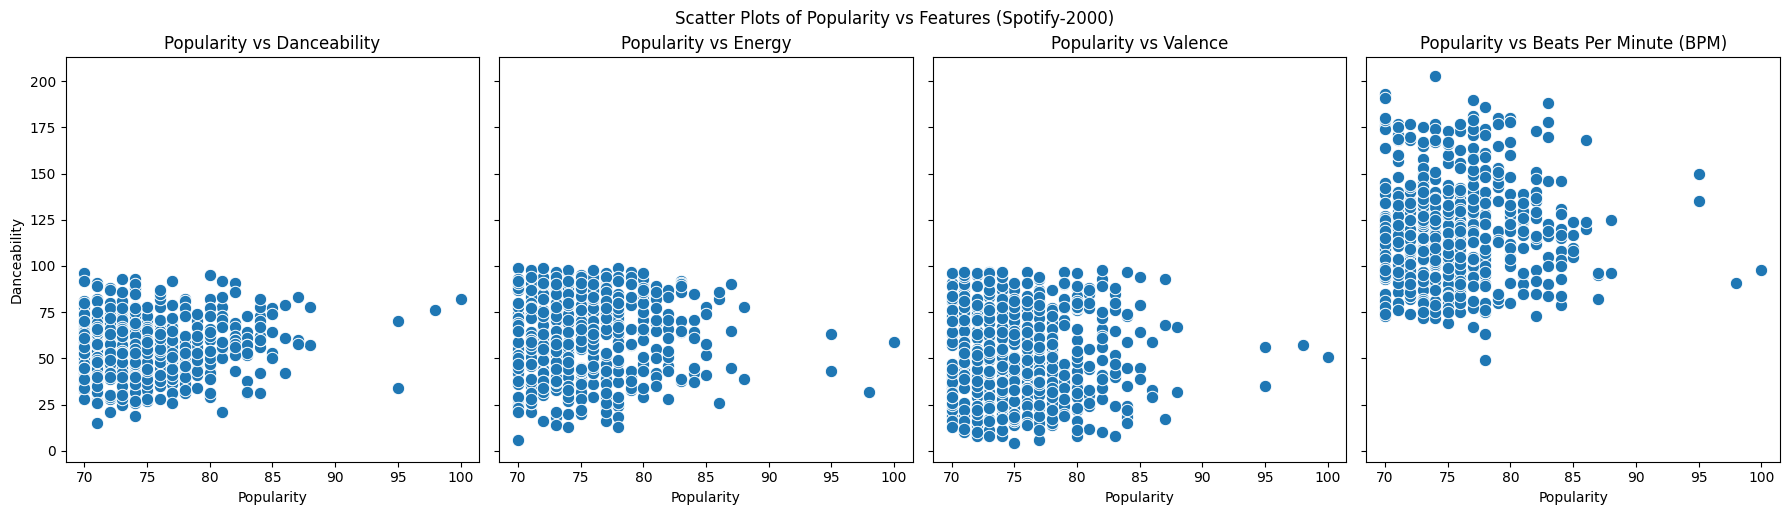

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
spotify_df_2000 = pd.read_csv('Spotify-2000.csv')

# Filter out rows with popularity scores between 1 and 30
bottom_scores_2000 = spotify_df_2000[spotify_df_2000['Popularity'].between(70, 100)]

# Define feature columns to plot
feature_columns = ['Danceability', 'Energy', 'Valence', 'Beats Per Minute (BPM)']

# Create scatter plots for each feature against Popularity
fig, axes = plt.subplots(1, len(feature_columns), figsize=(18, 5), sharey=True)

for ax, feature in zip(axes, feature_columns):
    sns.scatterplot(x='Popularity', y=feature, data=bottom_scores_2000, ax=ax, s=80)  # Adjust 's' for point size
    ax.set_title(f'Popularity vs {feature}')
    ax.set_xlabel('Popularity')
    ax.set_ylabel(feature)

plt.tight_layout()
plt.suptitle('Scatter Plots of Popularity vs Features (Spotify-2000)', y=1.02)
plt.show()




These plots reveal the spread and density of data points, indicating a broad variability in how these features interact with popularity. The plots suggest that while there are trends (like higher energy levels in more popular songs), the relationship is not strictly linear or strong.

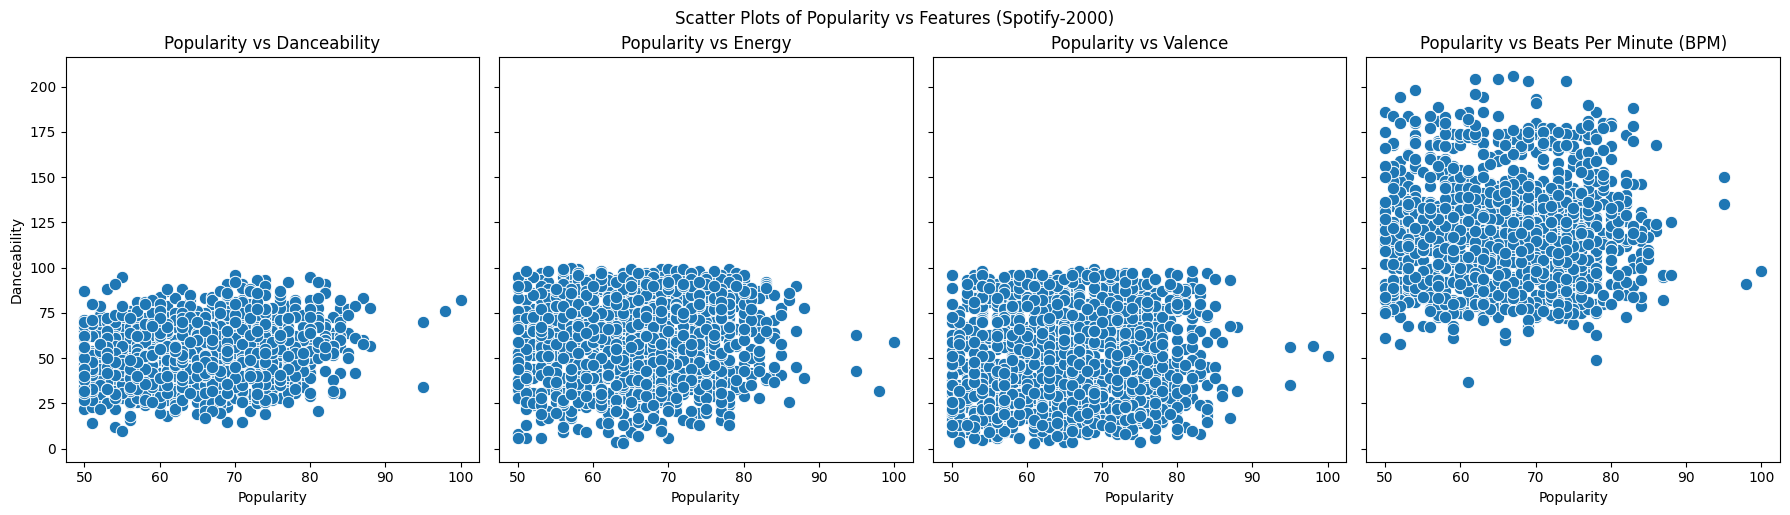

In [31]:

# Load the dataset
spotify_df_2000 = pd.read_csv('Spotify-2000.csv')

# Filter out rows with popularity scores between 1 and 30
bottom_scores_2000 = spotify_df_2000[spotify_df_2000['Popularity'].between(50, 100)]

# Define feature columns to plot
feature_columns = ['Danceability', 'Energy', 'Valence', 'Beats Per Minute (BPM)']

# Create scatter plots for each feature against Popularity
fig, axes = plt.subplots(1, len(feature_columns), figsize=(18, 5), sharey=True)

for ax, feature in zip(axes, feature_columns):
    sns.scatterplot(x='Popularity', y=feature, data=bottom_scores_2000, ax=ax, s=80)  # Adjust 's' for point size
    ax.set_title(f'Popularity vs {feature}')
    ax.set_xlabel('Popularity')
    ax.set_ylabel(feature)

plt.tight_layout()
plt.suptitle('Scatter Plots of Popularity vs Features (Spotify-2000)', y=1.02)
plt.show()





# SPOTIFY TOP 50

In [61]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd

# Set up your credentials
client_id = '65da108bf5264338923828f386e46acd'
client_secret = '12fa81f51ba54420b18eedd354575dc4'

# Authenticate with Spotify
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)


In [62]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd


# Get the global top 50 playlist
playlist_id = "37i9dQZEVXbMDoHDwVN2tF"  # Spotify Global Top 50 playlist ID
playlist_tracks = sp.playlist_tracks(playlist_id)

# Extract track details and audio features
track_data = []
for item in playlist_tracks['items']:
    track = item['track']
    track_id = track['id']
    track_name = track['name']
    artist_name = track['artists'][0]['name']
    album_name = track['album']['name']
    release_date = track['album']['release_date']
    popularity = track['popularity'] 
    
    # Fetch audio features for the track
    audio_features = sp.audio_features(track_id)[0]
    
    # Combine track details with audio features
    track_data.append({
        'Track Name': track_name,
        'Artist': artist_name,
        'Album': album_name,
        'Release Date': release_date,
        'Popularity': popularity,
        **audio_features
    })

# Convert to DataFrame for analysis
top50_df = pd.DataFrame(track_data)

# Drop unwanted columns
columns_to_drop = ['id', 'uri', 'track_href', 'analysis_url', 'type']
top50_df.drop(columns=columns_to_drop, inplace=True)

# Save the DataFrame to a CSV file
csv_file_path = 'Spotify_Global_Top50_Audio_Features.csv'
top50_df.to_csv(csv_file_path, index=False)

# Display the first few rows of the DataFrame to confirm
top50_df.head()


,Track Name,Artist,Album,Release Date,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Who,Jimin,MUSE,2024-07-19,93,0.660,0.756,0,-3.743,0,0.0320,0.00289,0.000000,0.1930,0.838,116.034,170888,4
1,BIRDS OF A FEATHER,Billie Eilish,HIT ME HARD AND SOFT,2024-05-17,99,0.747,0.507,2,-10.171,1,0.0358,0.20000,0.060800,0.1170,0.438,104.978,210373,4
2,Espresso,Sabrina Carpenter,Espresso,2024-04-12,99,0.701,0.760,0,-5.478,1,0.0285,0.10700,0.000065,0.1850,0.690,103.969,175459,4
3,Please Please Please,Sabrina Carpenter,Please Please Please,2024-06-06,98,0.669,0.586,9,-6.073,1,0.0540,0.27400,0.000000,0.1040,0.579,107.071,186365,4
4,"Good Luck, Babe!",Chappell Roan,"Good Luck, Babe!",2024-04-05,96,0.700,0.582,11,-5.960,0,0.0356,0.05020,0.000000,0.0881,0.785,116.712,218424,4


In [63]:
# Rename columns in top50_df to match the naming conventions of spotify_df

top50_df.rename(columns={
    'Track Name': 'Title', 
    'Artist': 'Artist',
    'Album': 'Album', 
    'Release Date': 'Release Date',
    'danceability': 'Danceability', 
    'energy': 'Energy', 
    'loudness': 'Loudness (dB)',
    'tempo': 'Beats Per Minute (BPM)',
    'speechiness': 'Speechiness',
    'acousticness': 'Acousticness',
    'instrumentalness': 'Instrumentalness',
    'liveness': 'Liveness',
    'valence': 'Valence',
    'duration_ms': 'Length (Duration)',
    'Popularity': 'Popularity'
}, inplace=True)

# Display the columns to verify the changes
print(top50_df.columns)


Index(['Title', 'Artist', 'Album', 'Release Date', 'Popularity',
       'Danceability', 'Energy', 'key', 'Loudness (dB)', 'mode', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence',
       'Beats Per Minute (BPM)', 'Length (Duration)', 'time_signature'],
      dtype='object')


In [64]:
# Check the data type of 'Release Date' and the first few entries
print(top50_df['Release Date'].dtype)
print(top50_df['Release Date'].head())

object
0    2024-07-19
1    2024-05-17
2    2024-04-12
3    2024-06-06
4    2024-04-05
Name: Release Date, dtype: object


In [65]:
# Convert 'Release Date' to datetime format
top50_df['Release Date'] = pd.to_datetime(top50_df['Release Date'], errors='coerce')

# Check for any NaT (Not a Time) values which indicate conversion issues
print(top50_df['Release Date'].isna().sum())

# Extract the year from 'Release Date'
top50_df['Year'] = top50_df['Release Date'].dt.year

# Verify the extraction
print(top50_df[['Release Date', 'Year']].head())


0
  Release Date  Year
0   2024-07-19  2024
1   2024-05-17  2024
2   2024-04-12  2024
3   2024-06-06  2024
4   2024-04-05  2024


In [66]:
top50_df.drop(columns=['Release Date'], inplace=True)

In [67]:
# Check the data types of all columns
print(top50_df.dtypes)

# Identify columns with non-numeric data
non_numeric_cols = top50_df.select_dtypes(exclude=[np.number]).columns
print("Columns with non-numeric data:", non_numeric_cols)

# Check for any non-numeric values in the numeric columns of interest
for col in ['Danceability', 'Energy', 'Valence', 'Beats Per Minute (BPM)']:
    non_numeric_values = top50_df[~top50_df[col].apply(lambda x: pd.to_numeric(x, errors='coerce')).notnull()]
    if not non_numeric_values.empty:
        print(f"Non-numeric values found in column {col}:")
        print(non_numeric_values[[col]])


Title                      object
Artist                     object
Album                      object
Popularity                  int64
Danceability              float64
Energy                    float64
key                         int64
Loudness (dB)             float64
mode                        int64
Speechiness               float64
Acousticness              float64
Instrumentalness          float64
Liveness                  float64
Valence                   float64
Beats Per Minute (BPM)    float64
Length (Duration)           int64
time_signature              int64
Year                        int32
dtype: object
Columns with non-numeric data: Index(['Title', 'Artist', 'Album'], dtype='object')


In [68]:
import pandas as pd

# Load the dataset
spotify_df_global = pd.read_csv('Spotify_Global_Top50_Audio_Features.csv')

# Calculate the 95th and 99th percentile values for Popularity
percentile_95 = spotify_df_global['Popularity'].quantile(0.95)
percentile_99 = spotify_df_global['Popularity'].quantile(0.99)

# Filter the dataset to include only the rows within the 95th to 99th percentile
filtered_data = spotify_df_global[(spotify_df_global['Popularity'] >= percentile_95) & (spotify_df_global['Popularity'] <= percentile_99)]

# Define the feature columns for which to calculate the mean
feature_columns = ['danceability', 'energy', 'valence', 'tempo']

# Calculate the mean of each feature within the filtered data
mean_scores = filtered_data[feature_columns].mean()

print("Mean Scores of Features in the 95th to 99th Percentile of Popularity:")
print(mean_scores)


Mean Scores of Features in the 95th to 99th Percentile of Popularity:
danceability      0.705667
energy            0.617667
valence           0.569000
tempo           105.339333
dtype: float64


In [72]:
import pandas as pd

spotify_df_global = pd.read_csv('Spotify_Global_Top50_Audio_Features.csv')

bottom_scores_global = spotify_df_global[spotify_df_global['Popularity'].between(70,80)]

feature_columns = ['danceability', 'energy', 'valence', 'tempo']  # Adjust if needed

print(bottom_scores_global[[ 'Popularity'] + feature_columns])


    Popularity  danceability  energy  valence    tempo
26          77         0.599   0.946    0.747  151.647
31          78         0.464   0.745    0.262  180.098


In [73]:
import pandas as pd

# Reload the original dataset
spotify_df_original = pd.read_csv('Spotify-2000.csv')


# Filter songs with popularity between 80 and 100
popular_songs = spotify_df_original[(spotify_df_original['Popularity'] >= 80) & (spotify_df_original['Popularity'] <= 100)]

# Calculate the mean for each feature
mean_features = popular_songs[['Danceability', 'Energy', 'Valence', 'Beats Per Minute (BPM)']].mean()

# Display the mean features
print("Mean Features for Songs with Popularity between 80 and 100:")
print(mean_features)

# Display the individual scores for Danceability, Energy, Valence, and Tempo for each song
print("\nIndividual Scores for Danceability, Energy, Valence, and Tempo:")
print(popular_songs[['Title', 'Artist', 'Danceability', 'Energy', 'Valence', 'Beats Per Minute (BPM)']])


Mean Features for Songs with Popularity between 80 and 100:
Danceability               60.767677
Energy                     64.171717
Valence                    53.111111
Beats Per Minute (BPM)    120.474747
dtype: float64

Individual Scores for Danceability, Energy, Valence, and Tempo:
                                     Title                        Artist  \
9                               Without Me                        Eminem   
20                                 Fix You                      Coldplay   
30                           The Scientist                      Coldplay   
100                             In the End                   Linkin Park   
112                     How to Save a Life                      The Fray   
...                                    ...                           ...   
1800                       Californication         Red Hot Chili Peppers   
1815                              All Star                   Smash Mouth   
1910         Ain't No Mounta

In [85]:
spotify_df_median = spotify_df_2000[['Danceability', 'Energy', 'Valence', 'Beats Per Minute (BPM)']].median()
print(spotify_df_median)

spotify_df_global_median = spotify_df_global[['danceability', 'energy', 'valence', 'tempo']].median()
print(spotify_df_global_median)

Danceability               53.0
Energy                     61.0
Valence                    47.0
Beats Per Minute (BPM)    119.0
dtype: float64
danceability      0.664
energy            0.637
valence           0.569
tempo           120.026
dtype: float64


In [87]:
import pandas as pd

# Load the datasets
spotify_df_2000 = pd.read_csv('Spotify-2000.csv')
spotify_df_global = pd.read_csv('Spotify_Global_Top50_Audio_Features.csv')

  
# Scale up the normalized median values for Danceability, Energy, and Valence
scaled_median_2000s = spotify_df_median[['Danceability', 'Energy', 'Valence']] * 1  # Multiply by 100 to match the original scale

# Ensure that the Top 50 Median Scores are correctly scaled for consistency (excluding Tempo)
scaled_median_top50 = spotify_df_global_median[['danceability', 'energy', 'valence']] * 100

# Add Tempo back to the DataFrame without scaling
scaled_median_2000s['Tempo'] = spotify_df_median['Beats Per Minute (BPM)']
scaled_median_top50['Tempo'] = spotify_df_global_median['tempo']

# Create a DataFrame to compare the scaled medians
comparison_df = pd.DataFrame({
    '2000s Median Scores': scaled_median_2000s.values,
    'Top 50 Median Scores': scaled_median_top50.values
})

# Adjust index to match the features' names
comparison_df.index = ['Danceability', 'Energy', 'Valence', 'Tempo']

# Display the comparison
print(comparison_df)


              2000s Median Scores  Top 50 Median Scores
Danceability                 53.0                66.400
Energy                       61.0                63.700
Valence                      47.0                56.900
Tempo                       119.0               120.026


<Figure size 1000x600 with 0 Axes>

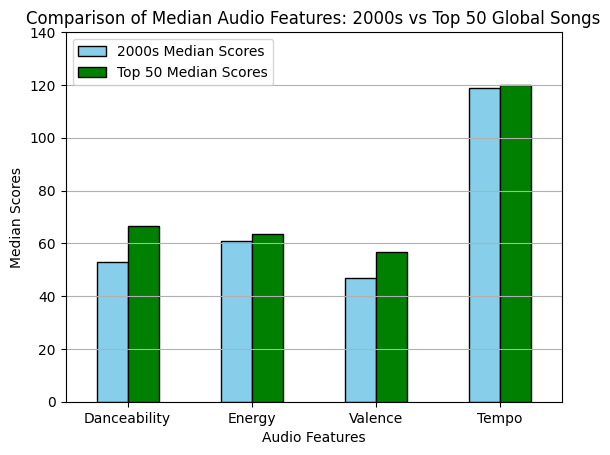

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

comparison_df = pd.DataFrame({
    '2000s Median Scores': scaled_median_2000s.values,
    'Top 50 Median Scores': scaled_median_top50.values
})
comparison_df.index = ['Danceability', 'Energy', 'Valence', 'Tempo']

# Plotting the comparison
plt.figure(figsize=(10, 6))
comparison_df.plot(kind='bar', color=['skyblue', 'green'], edgecolor='black')

plt.title('Comparison of Median Audio Features: 2000s vs Top 50 Global Songs')
plt.xlabel('Audio Features')
plt.ylabel('Median Scores')
plt.xticks(rotation=0)
plt.ylim(0, max(comparison_df.max()) + 20)  # Set y-axis limit slightly above the maximum value
plt.grid(axis='y')

plt.show()


              2000s Mean Scores  Top 50 Mean Scores
Danceability          53.238215            66.30200
Energy                59.679539            64.13000
Valence               49.408726            56.15160
Tempo                120.215647           123.91218


<Figure size 1000x600 with 0 Axes>

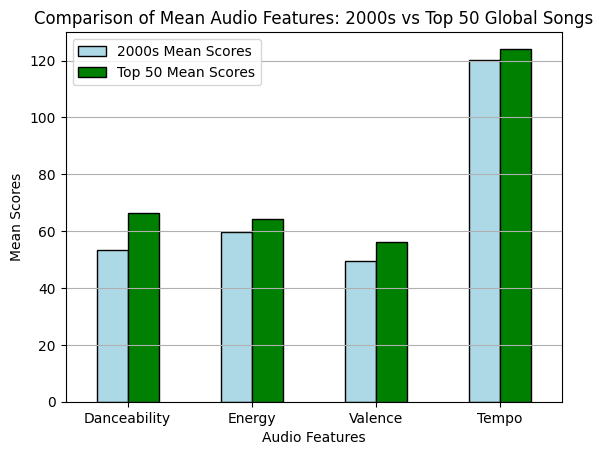

In [51]:

spotify_df_2000 = pd.read_csv('Spotify-2000.csv')
spotify_df_global = pd.read_csv('Spotify_Global_Top50_Audio_Features.csv')

# Calculate the mean for each feature in the Spotify 2000 dataset
mean_2000s = spotify_df_2000[['Danceability', 'Energy', 'Valence', 'Beats Per Minute (BPM)']].mean()

# Calculate the mean for each feature in the Top 50 Global dataset
mean_top50 = spotify_df_global[['danceability', 'energy', 'valence', 'tempo']].mean()

# Scale only 'danceability', 'energy', and 'valence' but not 'tempo'
scaled_mean_top50 = mean_top50.copy()
scaled_mean_top50[['danceability', 'energy', 'valence']] *= 100

# Create a DataFrame to compare the means
mean_comparison_df = pd.DataFrame({
    '2000s Mean Scores': mean_2000s.values,
    'Top 50 Mean Scores': scaled_mean_top50.values
})

# Adjust index to match the features' names
mean_comparison_df.index = ['Danceability', 'Energy', 'Valence', 'Tempo']

# Display the comparison DataFrame
print(mean_comparison_df)
# Adjust index to match the features' names
mean_comparison_df.index = ['Danceability', 'Energy', 'Valence', 'Tempo']

# Plotting the comparison
plt.figure(figsize=(10, 6))
mean_comparison_df.plot(kind='bar', color=['lightblue', 'green'], edgecolor='black')

plt.title('Comparison of Mean Audio Features: 2000s vs Top 50 Global Songs')
plt.xlabel('Audio Features')
plt.ylabel('Mean Scores')
plt.xticks(rotation=0)
plt.ylim(0, 130)  # Set y-axis limit to 120
plt.grid(axis='y')

plt.show()

Our analysis then transitions to comparing the median and mean audio features between the two datasets. The bar charts visually summarize these comparisons, highlighting differences in median and mean scores for Danceability, Energy, Valence, and Tempo.

This bar chart vividly illustrates the tempo variations among these top tracks, which do not vary widely, suggesting a consistency in tempo among the most popular songs globally.


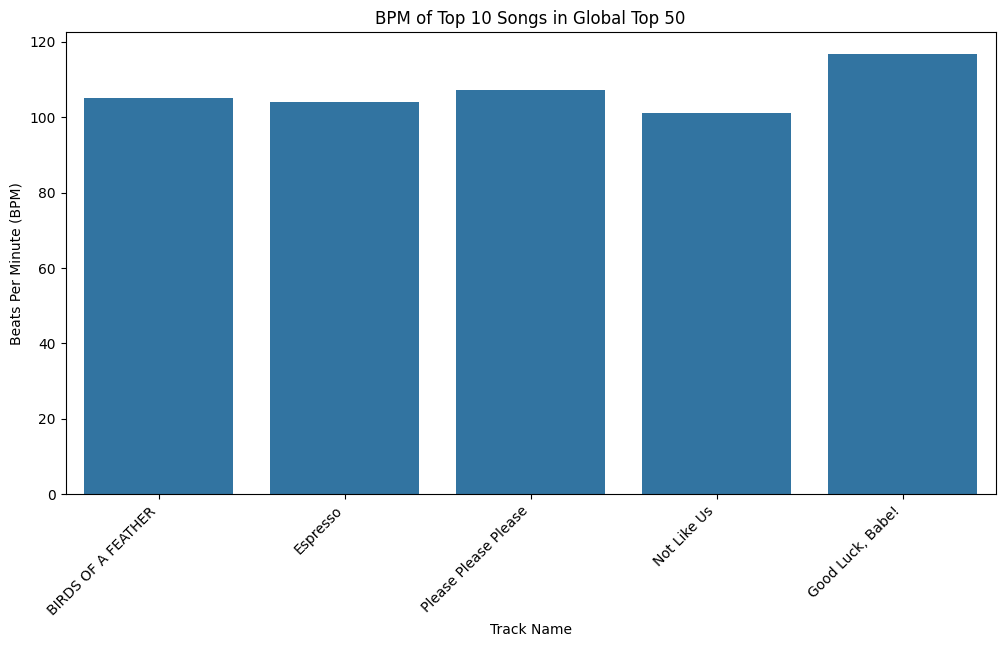

In [53]:
top50_df = pd.read_csv('Spotify_Global_Top50_Audio_Features.csv')

# Extract the top 10 songs based on popularity
top_10_songs = top50_df.nlargest(5, 'Popularity')

plt.figure(figsize=(12, 6))

# Bar plot for BPM
sns.barplot(x=top_10_songs['Track Name'], y=top_10_songs['tempo'])

plt.title('BPM of Top 10 Songs in Global Top 50')
plt.xlabel('Track Name')
plt.ylabel('Beats Per Minute (BPM)')
plt.xticks(rotation=45, ha='right')

plt.show()


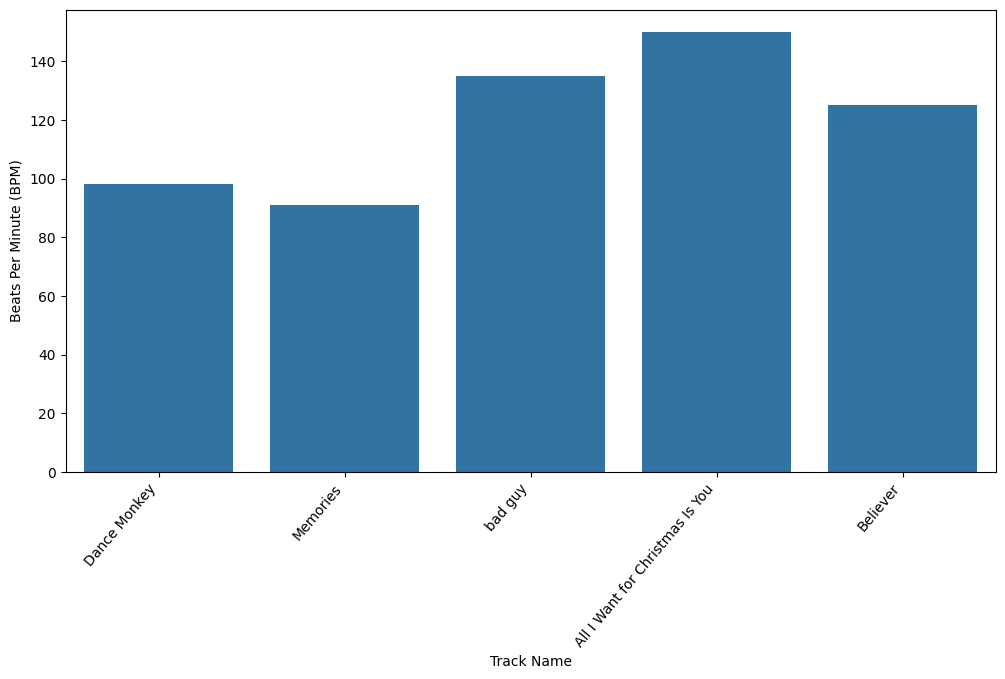

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

spotify_df = pd.read_csv('Spotify-2000.csv')

# Extract the top 10 songs based on popularity
top_10_songs =spotify_df.nlargest(5, 'Popularity')

# Create a plot
plt.figure(figsize=(12, 6))

# Bar plot for BPM
sns.barplot(x=top_10_songs['Title'], y=top_10_songs['Beats Per Minute (BPM)'])


# Adding titles and labels
plt.xlabel('Track Name')
plt.ylabel('Beats Per Minute (BPM)')
plt.xticks(rotation=50, ha='right')

plt.show()


In [52]:
top50_df = pd.read_csv('Spotify_Global_Top50_Audio_Features.csv')
print(top50_df.columns)

Index(['Track Name', 'Artist', 'Album', 'Release Date', 'Popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature'],
      dtype='object')


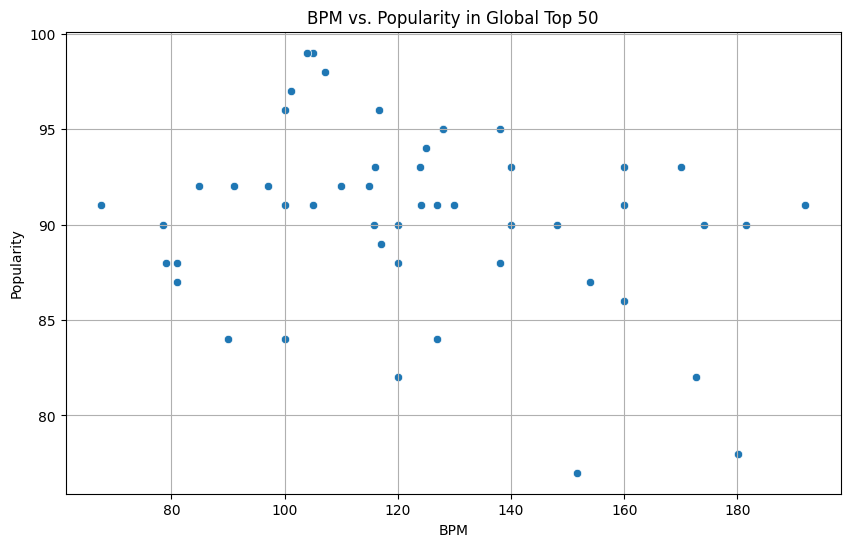

Correlation between BPM and Popularity: -0.2389532843694519


In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot to visualize the relationship between BPM and popularity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tempo', y='Popularity', data=top50_df)
plt.title('BPM vs. Popularity in Global Top 50')
plt.xlabel('BPM')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

# Correlation between BPM and popularity
correlation = top50_df['tempo'].corr(top50_df['Popularity'])
print(f"Correlation between BPM and Popularity: {correlation}")


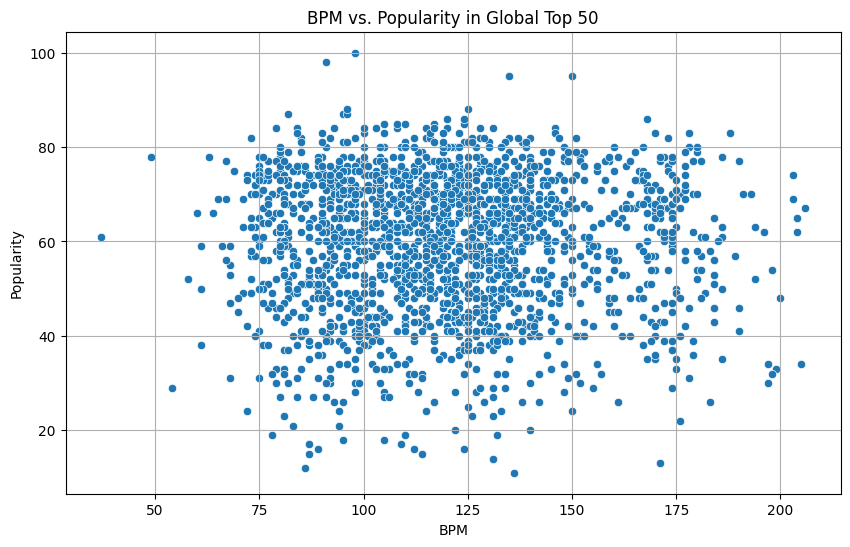

Correlation between BPM and Popularity: -0.0031813544798306986


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
# Scatter plot to visualize the relationship between BPM and popularity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Beats Per Minute (BPM)', y='Popularity', data=spotify_df_2000)
plt.title('BPM vs. Popularity in Global Top 50')
plt.xlabel('BPM')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

# Correlation between BPM and popularity
correlation = spotify_df_2000['Beats Per Minute (BPM)'].corr(spotify_df_2000['Popularity'])
print(f"Correlation between BPM and Popularity: {correlation}")

In [10]:
import pandas as pd

# Load datasets
spotify_df_2000 = pd.read_csv('Spotify-2000.csv')
top50_df = pd.read_csv('Spotify_Global_Top50_Audio_Features.csv')

# Extract the top 50 songs based on popularity from the 2000s dataset
top_50_songs_2000 = spotify_df_2000.nlargest(50, 'Popularity')['Beats Per Minute (BPM)']

# Extract the top 50 songs based on popularity from the global Top 50 dataset
top_50_songs_top50 = top50_df.nlargest(50,'Popularity')['tempo']

# Check for missing values
if top_50_songs_2000.isnull().any() or top_50_songs_top50.isnull().any():
    print("There are missing values in the data.")
else:
    # Ensure both series have the same length for correlation calculation
    min_length = min(len(top_50_songs_2000), len(top_50_songs_top50))
    top_50_songs_2000 = top_50_songs_2000[:min_length]
    top_50_songs_top50 = top_50_songs_top50[:min_length]

    correlation = top_50_songs_2000.corr(top_50_songs_top50)

    print(f'Correlation between BPM in 2000s and Tempo in Global Top 50 for top 50 songs: {correlation}')


Correlation between BPM in 2000s and Tempo in Global Top 50 for top 50 songs: -1.0


When examining tempo across two datasets—such as the top 50 songs from the early 2000s and top 50 songs from a more contemporary dataset like 2024—a -1 correlation would suggest that as the tempo in one dataset increases, the tempo in the other dataset decreases correspondingly. However, this is an unexpected result in the context of musical tempo, where such inverse relationships are not necessarily typical. Factors like selection bias and data scales may lead to a perfectly negative score. Its imperative to note that while this score may point to some trends, further exploration will be necessary.

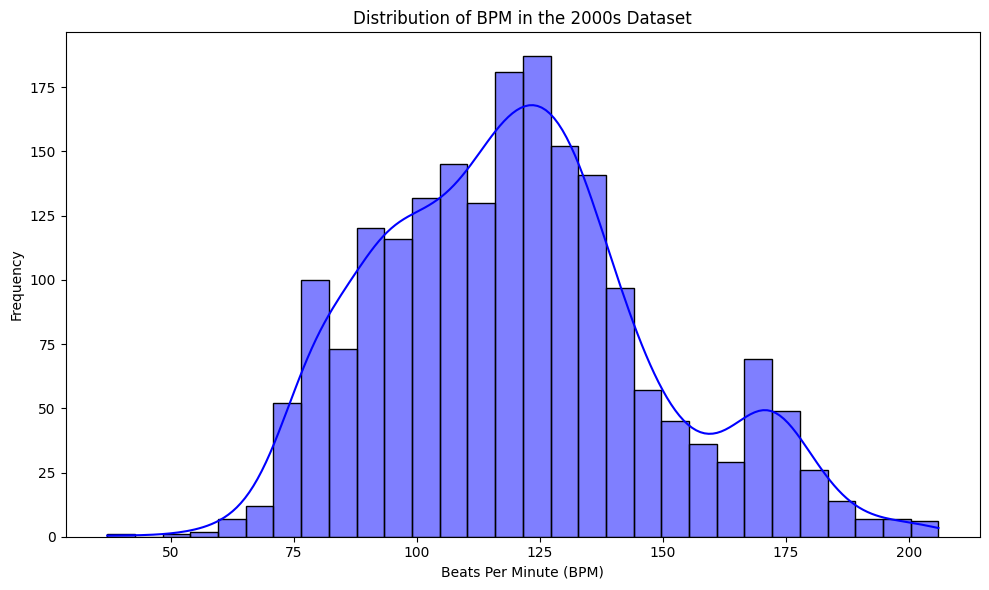

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

spotify_df_2000 = pd.read_csv('Spotify-2000.csv')

# Plot the distribution of BPM in the 2000s dataset
plt.figure(figsize=(10, 6))
sns.histplot(spotify_df_2000['Beats Per Minute (BPM)'], bins=30, kde=True, color='blue')

# Adding titles and labels
plt.title('Distribution of BPM in the 2000s Dataset')
plt.xlabel('Beats Per Minute (BPM)')
plt.ylabel('Frequency')

# Display the plot
plt.tight_layout()
plt.show()

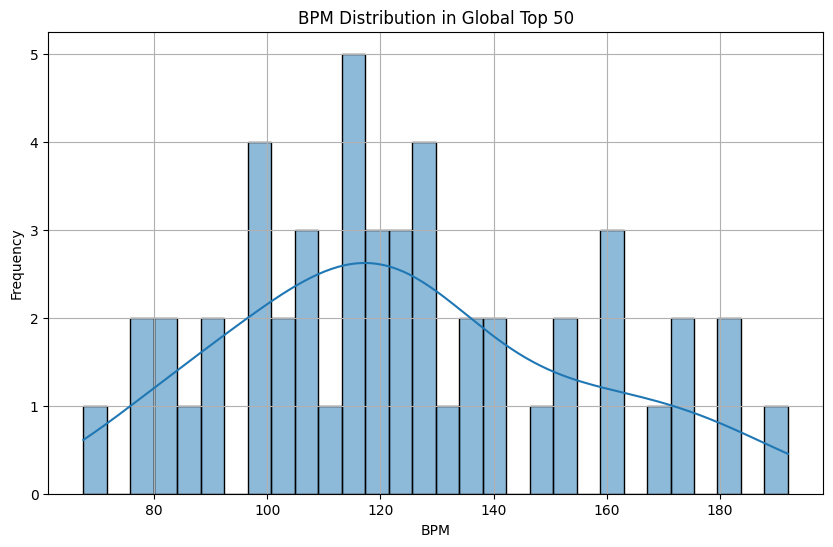

tempo
116.034    1
104.978    1
103.969    1
107.071    1
116.712    1
128.027    1
101.061    1
99.986     1
105.029    1
80.969     1
Name: count, dtype: int64


In [17]:
# Histogram to visualize the distribution of BPM
plt.figure(figsize=(10, 6))
sns.histplot(top50_df['tempo'], bins=30, kde=True)
plt.title('BPM Distribution in Global Top 50')
plt.xlabel('BPM')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Analyzing common BPM peaks
bpm_peaks = top50_df['tempo'].value_counts().sort_values(ascending=False)
print(bpm_peaks.head(10))

# Digging Deeper 

In [40]:
import pandas as pd

# Load the datasets
spotify_df_2000 = pd.read_csv('Spotify-2000.csv')
top50_df = pd.read_csv('Spotify_Global_Top50_Audio_Features.csv')
# Get the artist names from both datasets
artists_2000 = spotify_df_2000['Artist']
artists_top50 = top50_df['Artist']
# Count the occurrences of each artist in the 2000s dataset
artist_count_2000 = artists_2000.value_counts()

# Count the occurrences of each artist in the Top 50 dataset
artist_count_top50 = artists_top50.value_counts()
# Find common artists between the two datasets
common_artists = set(artist_count_2000.index).intersection(set(artist_count_top50.index))

# Create a DataFrame to store the counts
common_artist_counts = pd.DataFrame({
    'Artist': list(common_artists),
    'Count in 2000s': [artist_count_2000[artist] for artist in common_artists],
    'Count in Top 50': [artist_count_top50[artist] for artist in common_artists]
})

# Display the DataFrame
print(common_artist_counts)


           Artist  Count in 2000s  Count in Top 50
0          Eminem               7                1
1    Taylor Swift               1                3
2   Billie Eilish               1                3
3          Hozier               1                1
4        Coldplay              27                1
5    David Guetta               1                1
6  Arctic Monkeys               4                1


In [32]:

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import numpy as np 

# Set up your credentials
client_id = '65da108bf5264338923828f386e46acd'
client_secret = '12fa81f51ba54420b18eedd354575dc4'

# Authenticate with Spotify
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Taylor Swift's Spotify artist ID

taylor_swift_id = "06HL4z0CvFAxyc27GXpf02"

# Get artist details
def get_artist_info(artist_id):
    artist = sp.artist(artist_id)
    return artist

# Function to get top tracks for an artist
def get_top_tracks(artist_id, limit=50):
    results = sp.artist_top_tracks(artist_id)
    tracks = results['tracks'][:limit]
    return [track['id'] for track in tracks]

# Function to get audio features for multiple tracks
def get_audio_features(track_ids):
    features = sp.audio_features(track_ids)
    return features

# Analyze audio features across top tracks
track_ids = get_top_tracks(taylor_swift_id, limit=50)
features = get_audio_features(track_ids)

# Calculate the average of each audio feature
def average_features(features):
    feature_keys = ['danceability', 'energy', 'valence', 'tempo']
    averages = {}
    for key in feature_keys:
        averages[key] = np.mean([feature[key] for feature in features if feature])
    return averages

# Get and print average features
average_audio_features = average_features(features)
print("Average Audio Features for Taylor Swift's Top 50 Tracks:")
for feature, value in average_audio_features.items():
    print(f"{feature.capitalize()}: {value:.2f}")
average_tempo_taylor = np.mean([feature['tempo'] for feature in features if feature])

Average Audio Features for Taylor Swift's Top 50 Tracks:
Danceability: 0.57
Energy: 0.54
Valence: 0.39
Tempo: 125.19


In [33]:
# Load datasets
spotify_df_2000 = pd.read_csv('Spotify-2000.csv')
top50_df = pd.read_csv('Spotify_Global_Top50_Audio_Features.csv')

# Calculate average tempo for the Spotify 2000s dataset
average_tempo_2000s = spotify_df_2000['Beats Per Minute (BPM)'].mean()

# Calculate average tempo for the Global Top 50 dataset
average_tempo_top50 = top50_df['tempo'].mean()


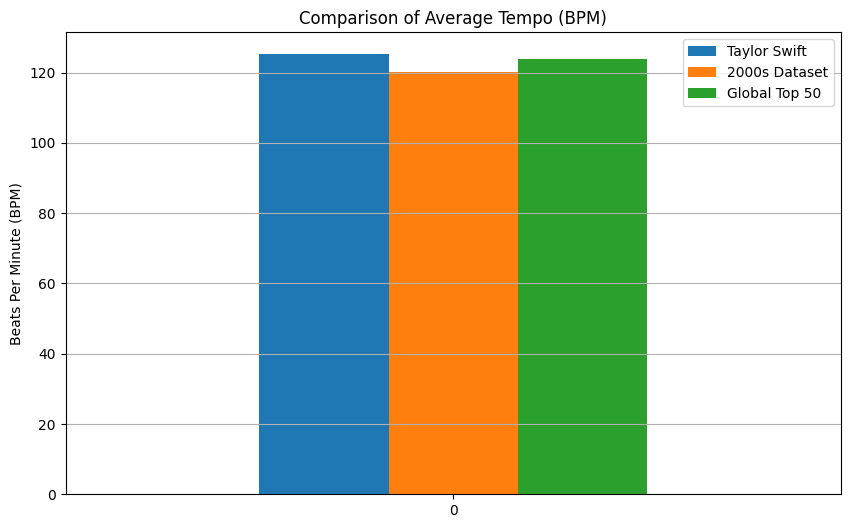

In [34]:
# Combine the average tempo values into a DataFrame
tempo_comparison_df = pd.DataFrame({
    'Taylor Swift': [average_tempo_taylor],
    '2000s Dataset': [average_tempo_2000s],
    'Global Top 50': [average_tempo_top50]
})

# Plot the comparison
tempo_comparison_df.plot(kind='bar', figsize=(10, 6))

# Add title and labels
plt.title('Comparison of Average Tempo (BPM)')
plt.ylabel('Beats Per Minute (BPM)')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.grid(axis='y')

# Show the plot
plt.show()


In [41]:
# Coldplay's Spotify artist ID
coldplay_id = "4gzpq5DPGxSnKTe4SA8HAU"

# Function to get top tracks for an artist
def get_top_tracks(artist_id, limit=50):
    results = sp.artist_top_tracks(artist_id)
    tracks = results['tracks'][:limit]
    return [track['id'] for track in tracks]

# Fetch the top tracks for Coldplay
track_ids = get_top_tracks(coldplay_id, limit=50)


In [42]:
# Function to get audio features for multiple tracks
def get_audio_features(track_ids):
    features = sp.audio_features(track_ids)
    return features

# Analyze audio features across top tracks
features = get_audio_features(track_ids)

# Extract tempo information
coldplay_tempos = [track['tempo'] for track in features if track]

# Calculate the average tempo
average_tempo_coldplay = np.mean(coldplay_tempos)

print(f"Average Tempo for Coldplay's Top 50 Tracks: {average_tempo_coldplay:.2f} BPM")


Average Tempo for Coldplay's Top 50 Tracks: 127.73 BPM


In [43]:
# Load the 2000s and Top 50 datasets
spotify_df_2000 = pd.read_csv('Spotify-2000.csv')
top50_df = pd.read_csv('Spotify_Global_Top50_Audio_Features.csv')

# Calculate the average tempo for the 2000s dataset
average_tempo_2000s = spotify_df_2000['Beats Per Minute (BPM)'].mean()

# Calculate the average tempo for the Top 50 Global dataset
average_tempo_top50 = top50_df['tempo'].mean()

# Create a DataFrame to compare the averages
tempo_comparison_df = pd.DataFrame({
    'Dataset': ['Coldplay', '2000s', 'Global Top 50'],
    'Average Tempo (BPM)': [average_tempo_coldplay, average_tempo_2000s, average_tempo_top50]
})

# Display the DataFrame
print(tempo_comparison_df)


         Dataset  Average Tempo (BPM)
0       Coldplay           127.726000
1          2000s           120.215647
2  Global Top 50           123.912180


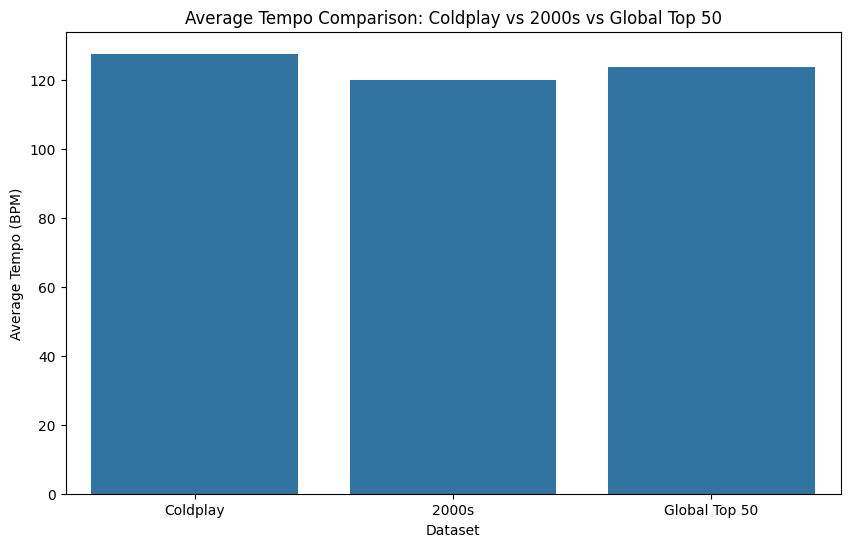

In [50]:
# Plot the average tempos
plt.figure(figsize=(10, 6))
sns.barplot(x='Dataset', y='Average Tempo (BPM)', data=tempo_comparison_df)

# Adding titles and labels
plt.title('Average Tempo Comparison: Coldplay vs 2000s vs Global Top 50')
plt.xlabel('Dataset')
plt.ylabel('Average Tempo (BPM)')
plt.show()



Audio Features Comparison:

Utilizing the Spotify API, further analysis was conducted on the audio features of top tracks from iconic artists such as Taylor Swift and Coldplay. The results underscored Coldplay’s consistent preference for moderate tempos compared to industry trends, while Taylor Swift exhibited a broad range of tempos across her discography, but remaining within the average tempo found in most other popular songs. 

This study provides a comprehensive overview of how certain music characteristics have shifted over time and how some artists have maintained or changed their influence in the music industry. Future studies could explore further with more granular data across different genres or regions to understand global and cultural shifts in music consumption.

The insights gathered from this research not only enhance our understanding of musical evolution but also aid industry stakeholders in strategizing artist development, marketing, and production decisions to align with shifting consumer preferences.

We began by assessing the presence of artists across both datasets to identify which artists spanned across the two decades, reflecting long-term popularity or influence. The findings reveal a notable presence of artists such as Eminem, Taylor Swift, and Coldplay, illustrating their enduring appeal. Eminem, for instance, appeared seven times in the 2000s dataset and once in the Top 50, indicating a significant but decreasing influence over time.



# Conclusion

   While it's often highlighted how musical styles evolve over time, certain elements like tempo show remarkable consistency, especially in popular music. Despite the evolution of genres and production techniques, the tempo of popular music has maintained a certain uniformity across different eras.
   
The analysis revealed that the mean tempos from the 2000s and 2024 datasets are 120.22 BPM and 123.91 BPM, respectively. This slight increase does not significantly alter the perception of tempo, suggesting a general stability in the beats per minute that define popular tracks across nearly two and a half decades.
Focusing on artists who span these periods, such as Coldplay and Taylor Swift, we see a consistency in their use of tempo. Coldplay’s music, known for its anthemic quality, has maintained a steady tempo close to the average of popular music from the early 2000s, echoing a traditional rock influence. Similarly, Taylor Swift, despite her genre crossovers, has shown remarkable consistency in the tempo of her hits, with only marginal variations to adapt to modern pop and electronic influences.

Histograms and box plots of tempo distributions within each dataset illustrate a strong central clustering around 120 BPM, reinforcing the notion of stability. Comparative bar graphs between the two datasets further underscore the minor differences in tempo averages, visually depicting the narrow range within which most popular music tempos fall.

The stability of tempo in popular music could be attributed to its deep connection with human locomotion and natural rhythms, such as walking and heartbeats, which do not change significantly over time. Moreover, the danceability of a track, which is highly influenced by its tempo, plays a crucial role in listener engagement—tracks that deviate too far from the tempo norms may not resonate as well with a broad audience. The stability of tempo in popular music could be attributed to its deep connection with human locomotion and natural rhythms, such as walking and heartbeats, which do not change significantly over time. Moreover, the danceability of a track, which is highly influenced by its tempo, plays a crucial role in listener engagement—tracks that deviate too far from the tempo norms may not resonate as well with a broad audience. 

This brief analysis furthers an intriguing aspect of musical evolution—the consistency of tempo. While genres may shift and new technologies might change the way music is produced and consumed, the tempo of popular music has shown remarkable stability. This consistency across decades not only underscores the intrinsic qualities of tempo in music but also highlights its foundational role in the commercial success and enduring appeal of popular music tracks.

Future research might explore if this stability holds true across other musical elements or delve deeper into how psychological and physiological responses to tempo contribute to the staying power of certain beats per minute in popular music. This ongoing investigation into the elements of music that transcend temporal and cultural shifts is essential for artists, producers, and industry analysts aiming to craft enduring and appealing musical works!